# Eksploracja danych

Przydatny link:
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [2]:
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
import torch.functional as F
import numpy as np
import pandas as pd
import torch.utils.data as data
import seaborn as sns
import matplotlib.pyplot as plt

Definicja ścieżek:

In [6]:
train_data_path = "train_data.csv"
test_data_path = "test_data.csv"

In [102]:
train_data = pd.read_csv(train_data_path)

#### Dane surowe:

In [106]:
train_data

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
1,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
3,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0
4,35840,1992,2007,8,355,5,corridor,individual_heating,management_in_trust,200.0,...,1.0,5.0,1.0,4.0,3.0,5.0,5.0,3,16.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,511504,2007,2017,8,1643,19,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
4120,298230,2006,2017,8,903,13,terraced,individual_heating,management_in_trust,123.0,...,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
4121,357522,2007,2017,8,868,20,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
4122,312389,1978,2017,8,1327,1,corridor,individual_heating,self_management,87.0,...,1.0,0.0,0.0,3.0,3.0,3.0,2.0,3,7.0,11.0


Odwołanie do danych surowych:

In [150]:
train_data.values

array([[0, 1985.0, 2007.0, ..., 3.0, 12.0, 4.0],
       [0, 1985.0, 2007.0, ..., 3.0, 12.0, 4.0],
       [1, 2006.0, 2007.0, ..., 5.0, 3.0, 7.0],
       ...,
       [1, 2007.0, 2017.0, ..., 10.0, 9.0, 10.0],
       [1, 1978.0, 2017.0, ..., 3.0, 7.0, 11.0],
       [1, 2007.0, 2017.0, ..., 10.0, 9.0, 10.0]], dtype=object)

Typy danych

In [151]:
train_data.dtypes

SalePrice                               int64
YearBuilt                             float64
YrSold                                float64
MonthSold                             float64
Size(sqf)                             float64
Floor                                 float64
HallwayType                            object
HeatingType                            object
AptManageType                          object
N_Parkinglot(Ground)                  float64
N_Parkinglot(Basement)                float64
TimeToBusStop                          object
TimeToSubway                           object
N_APT                                 float64
N_manager                             float64
N_elevators                           float64
SubwayStation                          object
N_FacilitiesNearBy(PublicOffice)      float64
N_FacilitiesNearBy(Hospital)          float64
N_FacilitiesNearBy(Dpartmentstore)    float64
N_FacilitiesNearBy(Mall)              float64
N_FacilitiesNearBy(ETC)           

Kolumny

In [152]:
train_data.columns

Index(['SalePrice', 'YearBuilt', 'YrSold', 'MonthSold', 'Size(sqf)', 'Floor',
       'HallwayType', 'HeatingType', 'AptManageType', 'N_Parkinglot(Ground)',
       'N_Parkinglot(Basement)', 'TimeToBusStop', 'TimeToSubway', 'N_APT',
       'N_manager', 'N_elevators', 'SubwayStation',
       'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)',
       'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(Park)',
       'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(Middle)',
       'N_SchoolNearBy(High)', 'N_SchoolNearBy(University)',
       'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)',
       'N_SchoolNearBy(Total)'],
      dtype='object')

**Kolumna do znalezienia**

In [153]:
anticipated_column = 'SalePrice'

In [154]:
train_data[anticipated_column] = train_data[anticipated_column].apply(lambda x: 1 if x > 300000 else 0)

Licza danych nullowalnych

In [155]:
pd.isna(train_data).sum()

SalePrice                             0
YearBuilt                             0
YrSold                                0
MonthSold                             0
Size(sqf)                             0
Floor                                 0
HallwayType                           0
HeatingType                           0
AptManageType                         0
N_Parkinglot(Ground)                  0
N_Parkinglot(Basement)                0
TimeToBusStop                         0
TimeToSubway                          0
N_APT                                 0
N_manager                             0
N_elevators                           0
SubwayStation                         0
N_FacilitiesNearBy(PublicOffice)      0
N_FacilitiesNearBy(Hospital)          0
N_FacilitiesNearBy(Dpartmentstore)    0
N_FacilitiesNearBy(Mall)              0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(Park)              0
N_SchoolNearBy(Elementary)            0
N_SchoolNearBy(Middle)                0


Konwersja typów dla z *int64* do *float64*

In [156]:
for int_column in train_data.select_dtypes("int64").columns:
    train_data[int_column] = train_data[int_column].astype("float64")

Histogramy

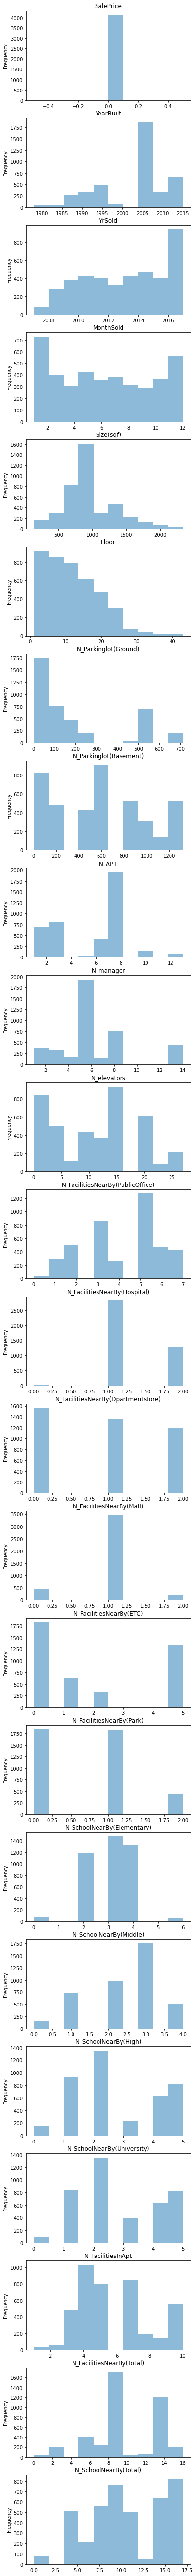

In [157]:
float_columns_names = train_data.select_dtypes("float").columns
plt.rcParams['figure.figsize'][0] = 6.0
plt.rcParams['figure.figsize'][1] = 4.0 * len(float_columns_names)
figure, axes = plt.subplots(len(float_columns_names), 1)
for i, column_name in enumerate(float_columns_names):
#     print(train_data[column_name].value_counts())
    train_data[column_name].plot.hist(ax = axes[i], alpha=0.5, title=column_name)

Heksbin-y (histogramy w 2D)

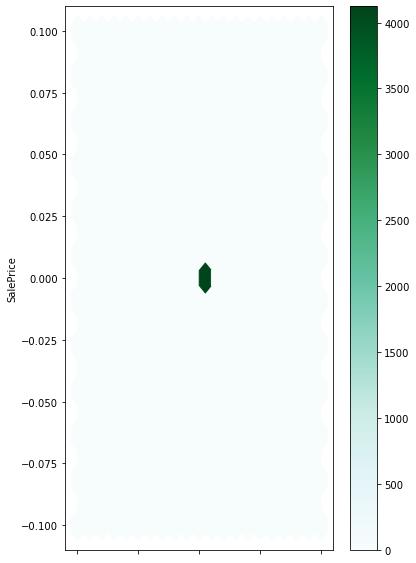

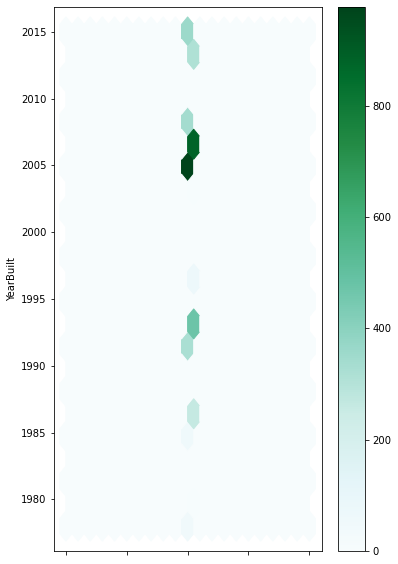

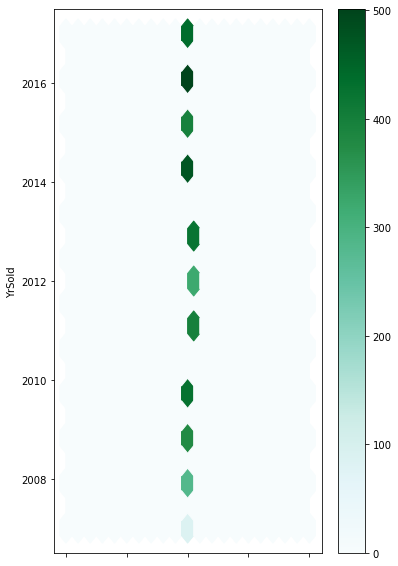

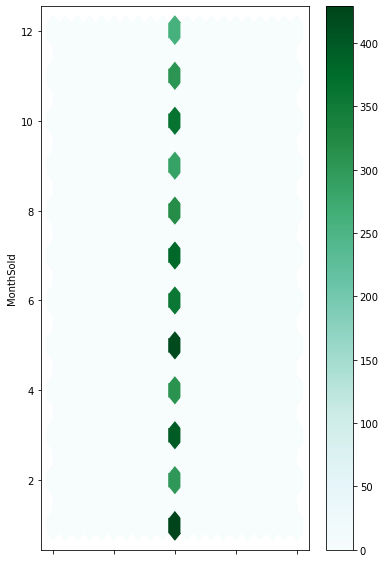

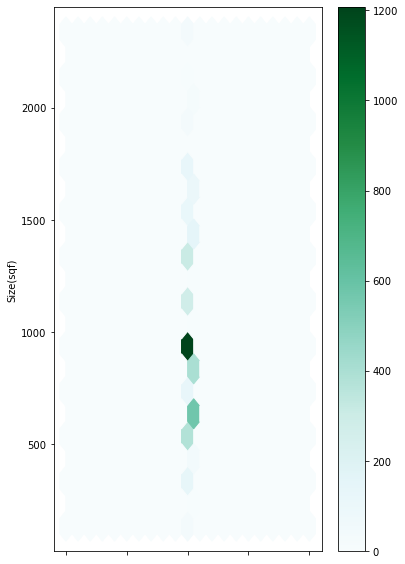

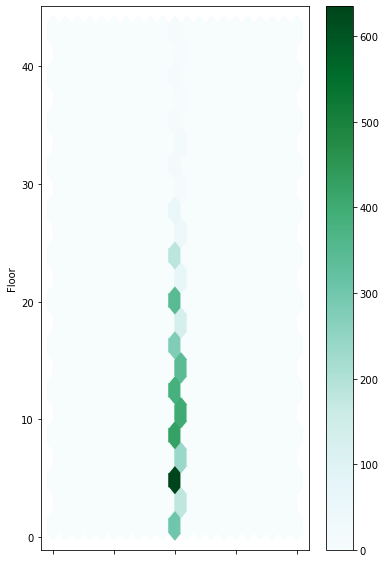

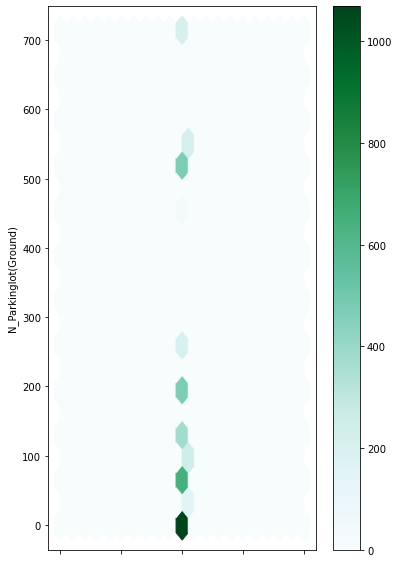

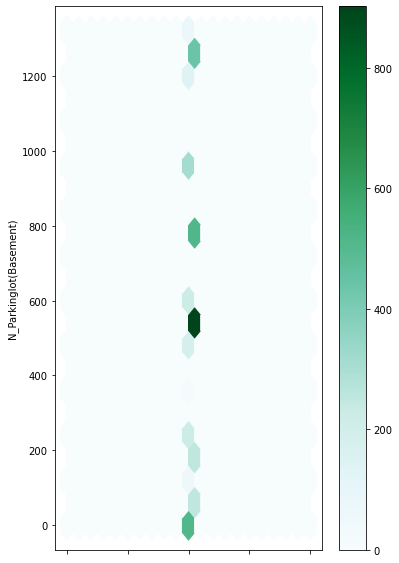

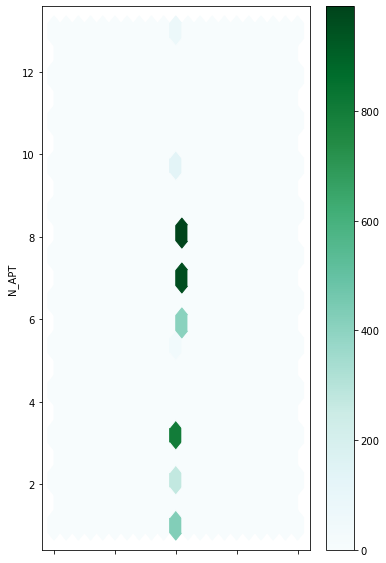

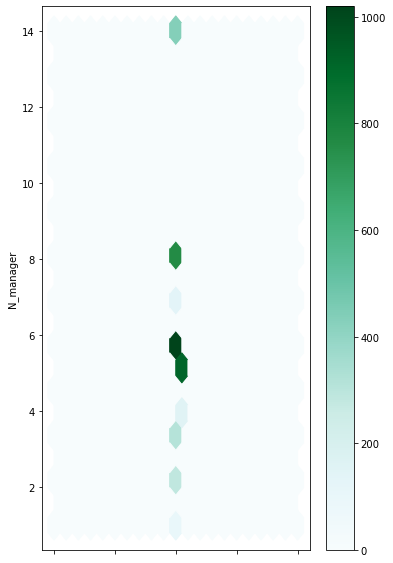

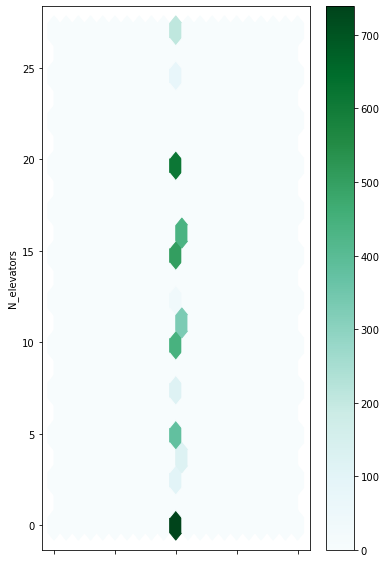

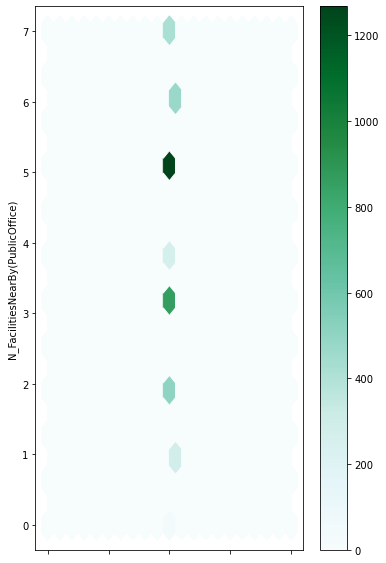

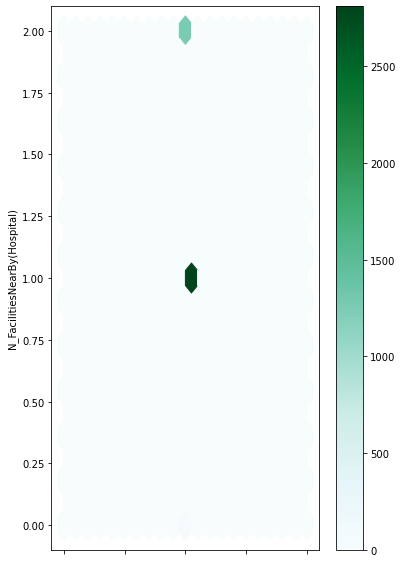

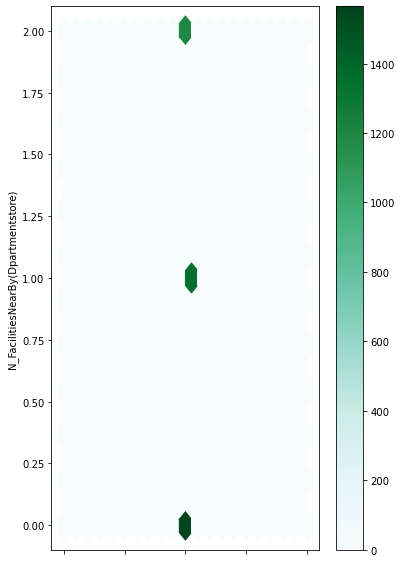

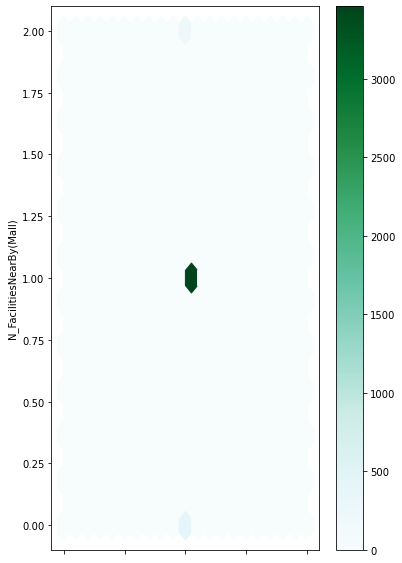

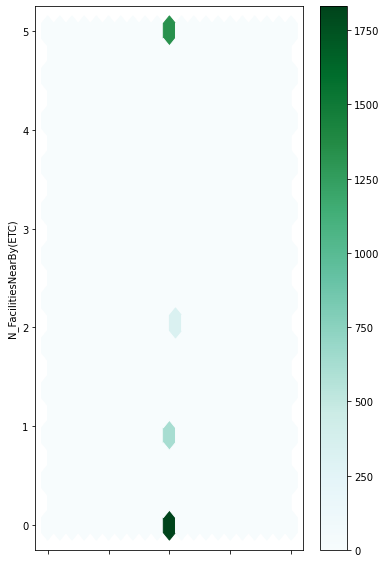

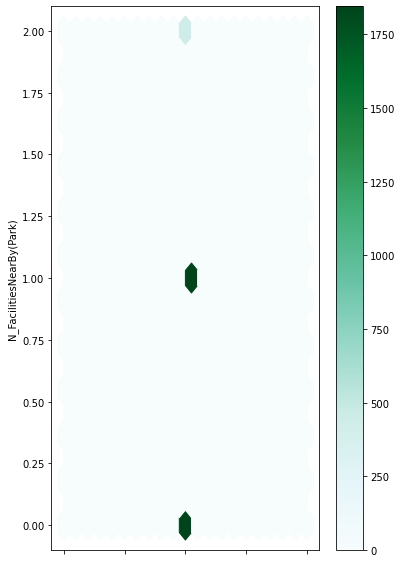

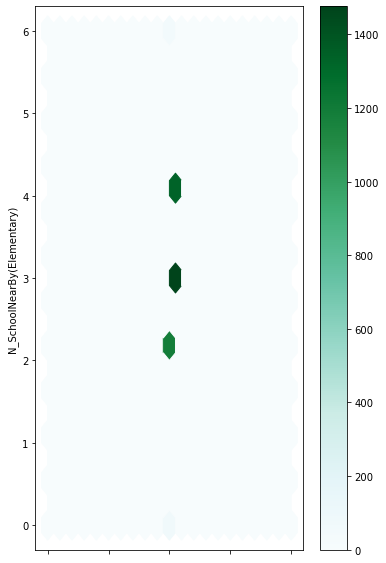

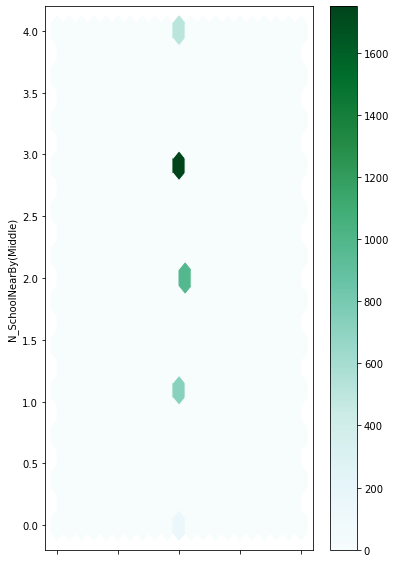

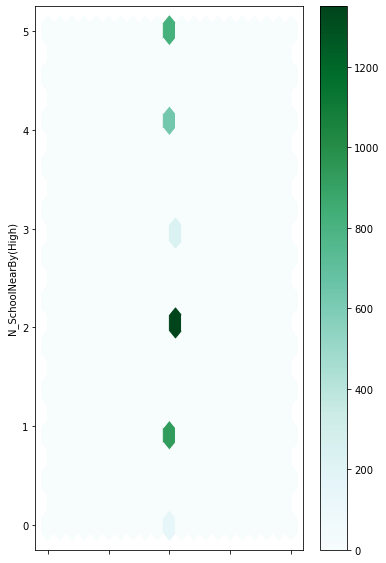

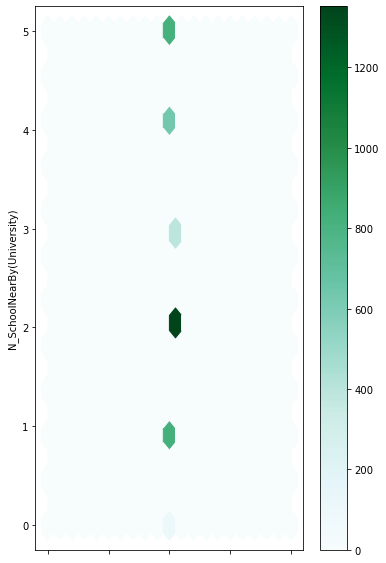

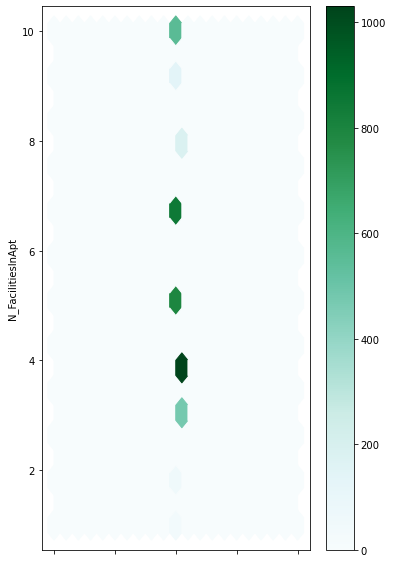

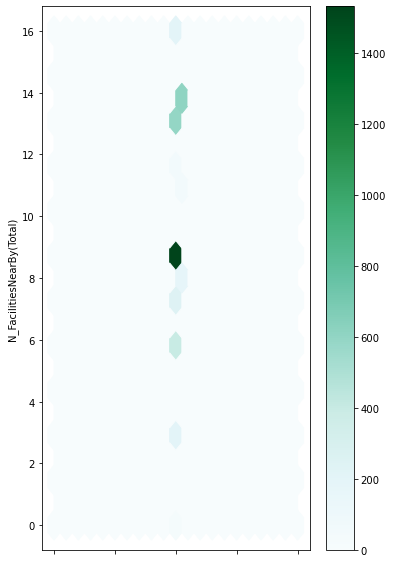

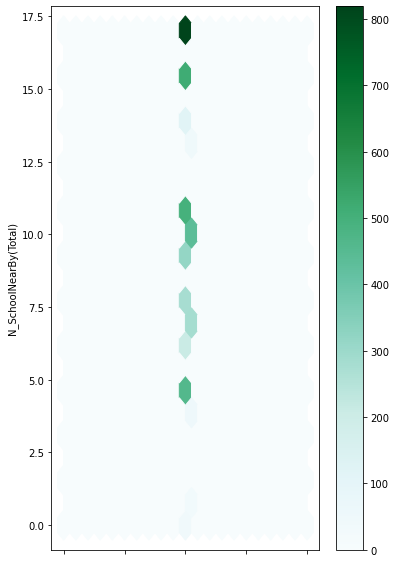

In [161]:
float_columns_names = train_data.select_dtypes("float").columns
# plt.rcParams['figure.figsize'][0] = 10.0
plt.rcParams['figure.figsize'][1] = 10.0
# figure, axes = plt.subplots(len(float_columns_names), 1)
for i, column_name in enumerate(float_columns_names):
#     print(train_data[column_name].value_counts())
    train_data.plot.hexbin(x = 'SalePrice', y = column_name, gridsize = 20)

In [116]:
object_columns_names = train_data.select_dtypes("object").columns
for name in object_columns_names:
    print(train_data[name].value_counts())

terraced    2487
mixed       1189
corridor     448
Name: HallwayType, dtype: int64
individual_heating    3914
central_heating        210
Name: HeatingType, dtype: int64
management_in_trust    3869
self_management         255
Name: AptManageType, dtype: int64
0~5min         3163
5min~10min      927
10min~15min      34
Name: TimeToBusStop, dtype: int64
0-5min                1943
5min~10min             807
15min~20min            672
10min~15min            547
no_bus_stop_nearby     155
Name: TimeToSubway, dtype: int64
Kyungbuk_uni_hospital    1139
Myung-duk                1064
Banwoldang                545
Bangoge                   517
Sin-nam                   445
no_subway_nearby          269
Chil-sung-market           77
Daegu                      68
Name: SubwayStation, dtype: int64
